### Edgar Moises Hernandez-Gonzalez
#### 11/03/20-05/06/20
#### Imagen de STFT de EEG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import cv2

In [2]:
#la muestra 3 es mano derecha
# canal C3 (canal 8)
# canal C4 (canal 12) (usar este)
canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[2, 11124:11624]
# canal = pd.read_csv("Ventaneo-A01T.csv", header=None).iloc[43:64, 5500:6000]

In [3]:
canal.shape

(500,)

(500,)


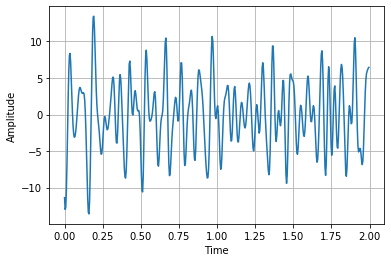

In [4]:
# Primer señal EEG del sujeto 1
# 2 segundos con fs=250Hz

fs = 250
time = np.arange(0, 2, 1/fs)
sig = canal
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

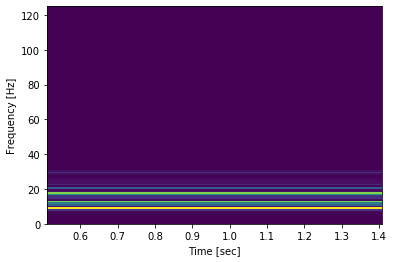

In [5]:
# Espectrograma con spectrogram, STFFT
f, t, Sxx = spectrogram(sig, fs)
plt.pcolormesh(t, f, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

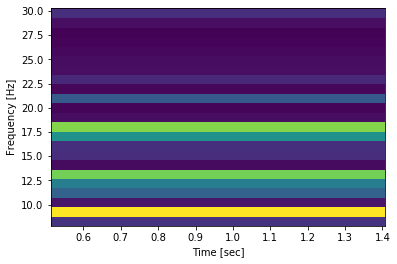

In [6]:
# Espectrograma con spectrogram, STFFT (Zoom)
f, t, Sxx = spectrogram(sig, fs)
plt.pcolormesh(t, f, Sxx)
plt.axis([t[0], t[-1:], f[8], f[31]])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [7]:
print("Shape Espectrograma:", Sxx.shape)
print("Valores de f:\n", f[8:32])

Shape Espectrograma: (129, 2)
Valores de f:
 [ 7.8125     8.7890625  9.765625  10.7421875 11.71875   12.6953125
 13.671875  14.6484375 15.625     16.6015625 17.578125  18.5546875
 19.53125   20.5078125 21.484375  22.4609375 23.4375    24.4140625
 25.390625  26.3671875 27.34375   28.3203125 29.296875  30.2734375]


STFFT
(24, 2)


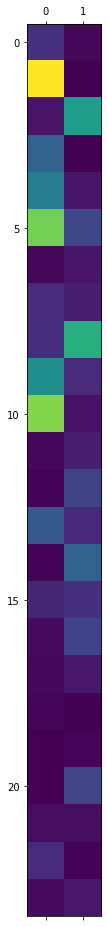

In [8]:
print("STFFT")
x = Sxx[8:32, :]
print(x.shape)
plt.matshow(x)
plt.show()

STFFT a escala de grises, esto es lo que se va a clasificar
(24, 2)
[[0.72489362 0.13165065]
 [4.89607845 0.05486316]
 [0.27802443 2.76041019]
 [1.53447624 0.05047466]
 [2.07973572 0.32568863]
 [3.85461424 1.06189471]
 [0.13448453 0.33355843]
 [0.62470197 0.43294775]
 [0.67070646 3.07951844]
 [2.45392813 0.63247588]
 [3.99527698 0.27391424]
 [0.15544287 0.43116011]
 [0.06959422 1.02356313]
 [1.37104092 0.57675639]
 [0.07843156 1.55044787]
 [0.53611991 0.69524389]
 [0.17844507 1.01849237]
 [0.15855239 0.35049752]
 [0.09908188 0.0678198 ]
 [0.04753664 0.10454131]
 [0.03031891 1.05626437]
 [0.18847972 0.21960646]
 [0.65197437 0.06853027]
 [0.17687625 0.33812244]]


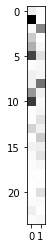

In [9]:
print("STFFT a escala de grises, esto es lo que se va a clasificar")
print(x.shape)
print(x)
plt.imshow(x, cmap='Greys')
plt.show()

(12, 2)


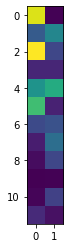

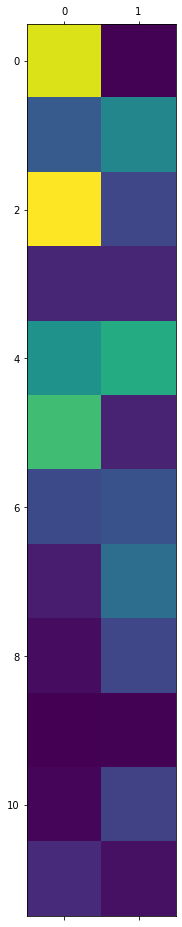

In [10]:
# en el resize solo las filas se dividen / 2
dim = (2, 12) #ancho, alto
resized = cv2.resize(x, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

plt.matshow(resized)
plt.show()

##### Prueba de analisis de imagenes

In [0]:
#x2 = x
#x2 = MinMaxScaler(feature_range=(0, 255)).fit_transform(x)
#x2 = StandardScaler().fit_transform(x)

In [0]:
#talvez esta linea no hace falta porque /255 siempre da flotantes
#x2 = np.floor(x2) # aqui talvez puede ser ceil

In [0]:
#convertir a float
#x = x.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
#x /= 255.0

(24, 4)
[[1.09057724e-02 3.31270385e-05 1.25670747e-03 4.04172903e-03]
 [1.23389885e-02 4.61007329e-03 5.15313761e-04 1.23727191e-02]
 [2.71981885e-03 1.34094879e-02 9.88731068e-03 1.37422641e-03]
 [6.89323433e-03 1.11215143e-03 2.83736200e-03 9.24870931e-03]
 [2.28682254e-03 4.29681689e-03 2.98214611e-03 1.46438349e-02]
 [2.15890873e-02 1.33641390e-02 1.01825735e-02 1.31753720e-02]
 [4.17031068e-03 2.95048486e-03 6.56707969e-04 1.02895508e-02]
 [7.64405960e-03 1.60938397e-03 5.88993635e-03 3.48695181e-03]
 [1.26432942e-03 3.40481941e-03 1.41889590e-03 7.35276565e-03]
 [6.81320112e-03 6.41797343e-03 7.30698043e-03 2.62220297e-03]
 [2.10983749e-03 3.58214928e-03 4.65291366e-03 8.76497070e-04]
 [7.42149958e-03 1.13480748e-03 6.10075018e-04 8.91807897e-04]
 [2.73783132e-03 1.47599878e-03 1.06021506e-03 6.50916714e-04]
 [2.29134620e-03 9.50365420e-03 6.83277030e-04 3.42809479e-03]
 [3.45162954e-03 1.48383406e-04 5.89527842e-03 1.77324575e-03]
 [7.37445516e-05 8.70973861e-04 6.14368170e-03 

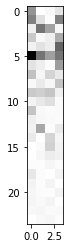

In [0]:
# los valores siempre son float
#print(x2.shape)
#print(x2)
#plt.imshow(x2, cmap='Greys')
#plt.show()

In [27]:
imgRGB = np.zeros((24,2,3))

In [28]:
imgRGB[:,:,0] = x
imgRGB[:,:,1] = x
imgRGB[:,:,2] = x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(24, 2, 3)


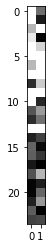

In [29]:
# esta es la imagen final
print(imgRGB.shape)
plt.imshow(imgRGB)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(24, 2, 3)


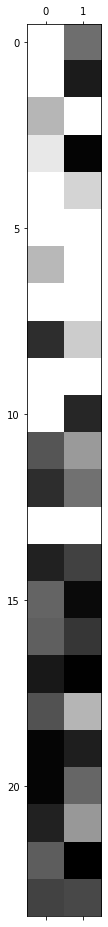

In [30]:
# creo esta es la imagen chida
print(imgRGB.shape)
plt.matshow(imgRGB)
plt.show()